In [5]:
!pip install yfinance

                                              0.0/63.0 kB ? eta -:--:--
                                              0.0/63.0 kB ? eta -:--:--
                                              0.0/63.0 kB ? eta -:--:--
     -------------                            20.5/63.0 kB ? eta -:--:--
     ------------------------               41.0/63.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------  61.4/63.0 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 63.0/63.0 kB 484.0 kB/s eta 0:00:00
                                              0.0/10.6 MB ? eta -:--:--
                                              0.0/10.6 MB ? eta -:--:--
                                              0.0/10.6 MB ? eta -:--:--
                                              0.0/10.6 MB ? eta -:--:--
                                              0.0/10.6 MB ? eta -:--:--
                                              0.0/10.6 MB ? eta -:--:--
                                       


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
!pip install requests beautifulsoup4



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")

# Reset the index of the dataframe
tesla_data_reset = tesla_data.reset_index()

# Display the first five rows
print(tesla_data_reset.head())


                       Date       Open       High        Low      Close  \
0 2018-07-27 00:00:00-04:00  20.483334  20.512667  19.689333  19.812000   
1 2018-07-30 00:00:00-04:00  19.726667  19.740000  19.075333  19.344667   
2 2018-07-31 00:00:00-04:00  19.483334  19.888000  19.271334  19.875999   
3 2018-08-01 00:00:00-04:00  19.865999  20.200001  19.533333  20.056000   
4 2018-08-02 00:00:00-04:00  21.896000  23.332666  21.544001  23.302668   

      Volume  Dividends  Stock Splits  
0   85549500        0.0           0.0  
1  102211500        0.0           0.0  
2   76153500        0.0           0.0  
3  151941000        0.0           0.0  
4  348225000        0.0           0.0  


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage you want to extract data from
url = "URL_TO_THE_WEBSITE_CONTAINING_TESLA_REVENUE"
# Send a request to the website
r = requests.get(url)
# Get the HTML of the page
webpage_html = r.text
# Create a BeautifulSoup object and specify the parser
soup = BeautifulSoup(webpage_html, 'html.parser')
# Define an empty list to hold the scraped data
data = []
# Assuming that the revenue data is contained in table rows
# Modify this to suit the structure of your webpage
for row in soup.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text for col in cols]
    data.append(cols)
# Convert the list into a dataframe
df = pd.DataFrame(data)
# Let's say that the first column contains dates and the second column contains revenue
df.columns = ['Date', 'Revenue']

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)

# Reset the index of the dataframe
tesla_revenue = df.set_index('Date')

# Display the last five rows
print(tesla_revenue.tail())


MissingSchema: Invalid URL 'URL_TO_THE_WEBSITE_CONTAINING_TESLA_REVENUE': No scheme supplied. Perhaps you meant https://URL_TO_THE_WEBSITE_CONTAINING_TESLA_REVENUE?

In [9]:
import yfinance as yf

# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")

# Reset the index of the dataframe
gme_data_reset = gme_data.reset_index()

# Display the first five rows
print(gme_data_reset.head())


                       Date      Open      High       Low     Close    Volume  \
0 2018-07-27 00:00:00-04:00  3.425709  3.439495  3.342996  3.407329   5658000   
1 2018-07-30 00:00:00-04:00  3.418817  3.441793  3.352187  3.377460   6311200   
2 2018-07-31 00:00:00-04:00  3.382055  3.384353  3.310830  3.310830  11030000   
3 2018-08-01 00:00:00-04:00  3.313127  3.418817  3.308532  3.384353   8318800   
4 2018-08-02 00:00:00-04:00  3.356781  3.395841  3.310830  3.359079  10116400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GME revenue data
url_gme = "URL_TO_THE_WEBSITE_CONTAINING_GME_REVENUE"
# Request the webpage
r_gme = requests.get(url_gme)
# Parse the webpage's content
soup_gme = BeautifulSoup(r_gme.text, 'html.parser')
# Define an empty list to store the scraped data
data_gme = []
# Assuming revenue data is contained within table rows
# Adjust these lines to match the structure of your webpage
for row in soup_gme.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text for col in cols]
    data_gme.append(cols)
# Convert the list to a dataframe
df_gme = pd.DataFrame(data_gme)
# Assuming the first column is the date and the second is the revenue
df_gme.columns = ['Date', 'Revenue']
# Convert 'Date' to datetime format
df_gme['Date'] = pd.to_datetime(df_gme['Date'])
# Sort the dataframe by date
df_gme.sort_values(by='Date', inplace=True)
# Reset the dataframe index
gme_revenue = df_gme.set_index('Date')
# Display the last five rows
print(gme_revenue.tail())


In [11]:
!pip install matplotlib

                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB 81.9 kB/s eta 0:01:32
                                              0.0/7.5 MB 81.9 kB/s eta 0:01:32
                                              0.0/7.5 MB 81.9


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7.5 MB 22.4 kB/s eta 0:00:49
     ----------------------------------       6.4/7

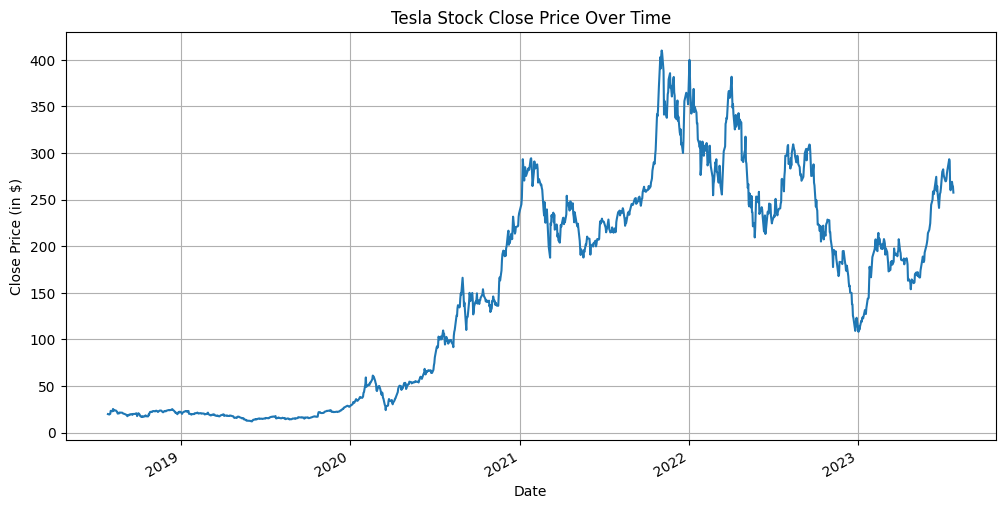

In [12]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    stock_data['Close'].plot(title=title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (in $)')
    plt.grid(True)
    plt.show()

# Allready have the tesla_data dataframe from Question 1
tesla_title = "Tesla Stock Close Price Over Time"
make_graph(tesla_data, tesla_title)


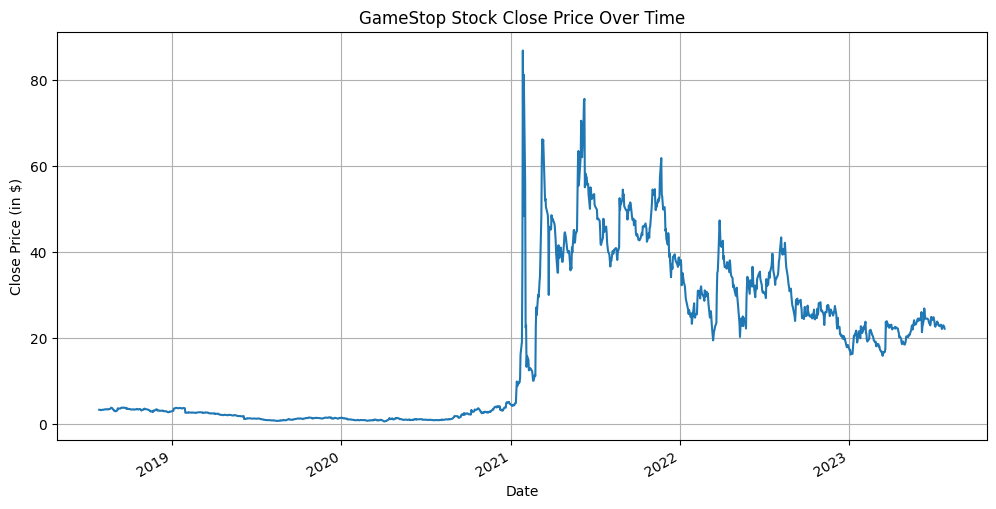

In [13]:
# Already have the gme_data dataframe from Question 3
gme_title = "GameStop Stock Close Price Over Time"
make_graph(gme_data, gme_title)
